# Child Poverty in the United States: <br>Contributing Factors and Geographical Variations

#### Principal Investigator: Yushi Wu <br> Email: yw2122@nyu.edu

## Introduction

Child poverty refers to the state of people under the age of 18 living in families with income below poverty level. Although the United States is one of the richest countries in the world, it has one of the highest child poverty rates, which is a very concerning fact.

This project will investigate factors that might affect child poverty in the United States and geographical variations at the county level. The main factors that are examined are races and family types (whether the child is raised by two or one parent in the family). Also, the geographical distribution and variation of child poverty rates seem to correlate to the demographics of different areas. This project will try to visualize the geographical variation and its correlation with one of the most outstanding demographics, which is racial concentration.

The key element of this project is the use of Census API providing access to data of poverty status in different aspects (age, family type, race, etc) at the county level, and the use of matplotlib and geopandas to plot comparing charts and national maps.

This project has three sections:

- Basic statistics about child poverty in the United States will be presented.

- A detailed examination of two factors, which are race and family type, in year 2016 (the most recent available data from American Community Survey from Census API) will be presented.

- National maps showing the relationship between geographical variations and racial concentration distribution will be presented.

### Requisite Packages

In [119]:
from IPython.display import display, Image # Displays things nicely
import pandas as pd # Data Package 
import matplotlib.pyplot as plt # Graphics
from matplotlib.patches import Ellipse 
import numpy as np # Numerical operations
import os

from census import Census # for grabbing data from Census API
from us import states

import fiona # Needed for geopandas to run
import geopandas as gpd # this is the main geopandas 
from shapely.geometry import Point, Polygon 

## Part 1: Basic Statistics about US Child Poverty
---
In this part, I will access and read data from Census API about total population under 18 and the population in poverty under 18. Then I will calculate the child poverty rate and young child(under 6 years old) poverty rate based on these data.

In [120]:
my_api_key = "6d08ff7a7a1f5f90fb8d1972aedd83d457ea17e3"

c = Census(my_api_key)

In [121]:
code = ("NAME","B09001_001E",# grabbing the total population under 18,
        "B17020_003E",  # poverty population, under 6 years
        "B17020_004E",  # poverty population, 6-11 years
        "B17020_005E",  # poverty population, 12-17 years
        "B17020_011E"   # above poverty level, under 6 years
        ) 

c_pov = c.acs5.get(code, {'for': 'county:*' }, year=2016) # grabbing data for year 2016 at the conuty level

c_pov = pd.DataFrame(c_pov) # Convert into DataFrame

c_pov = c_pov.rename(columns = 
    {"B09001_001E":"Total Population under 18",
     "B17020_003E":"Poverty Population, under 6 years",
     "B17020_004E":"Poverty Population, 6-11 years",
     "B17020_005E":"Poverty Population, 12-17 years",
     "B17020_011E":"Above Poverty Level, under 6 years"
    })

# Calculating total child population in poverty
c_pov["Total Children in Poverty"] = c_pov["Poverty Population, under 6 years"]+c_pov["Poverty Population, 6-11 years"]
c_pov["Total Children in Poverty"] = c_pov["Total Children in Poverty"]+c_pov["Poverty Population, 12-17 years"]

# Calculating poverty rate
c_pov["Child Poverty Rate in 2016"] = c_pov["Total Children in Poverty"]/c_pov["Total Population under 18"]

# Calculating total young children
c_pov["Total Young Children"] = c_pov["Poverty Population, under 6 years"]+c_pov["Above Poverty Level, under 6 years"]


In [122]:
c_pov.set_index("state", inplace = True)
c_pov.drop(["02","15","72"],inplace = True)   # dropping Alaska, Hawaii and Puerto Rico
c_pov.head()

,Total Population under 18,"Poverty Population, under 6 years","Poverty Population, 6-11 years","Poverty Population, 12-17 years","Above Poverty Level, under 6 years",NAME,county,Total Children in Poverty,Child Poverty Rate in 2016,Total Young Children
state,,,,,,,,,,
01,13853.0,598.0,806.0,896.0,3263.0,"Autauga County, Alabama",001,2300.0,0.166029,3861.0
01,44270.0,3060.0,2647.0,2364.0,10626.0,"Baldwin County, Alabama",003,8071.0,0.182313,13686.0
01,5735.0,1115.0,721.0,717.0,771.0,"Barbour County, Alabama",005,2553.0,0.445161,1886.0
01,4756.0,492.0,308.0,436.0,949.0,"Bibb County, Alabama",007,1236.0,0.259882,1441.0
01,13601.0,1205.0,1463.0,887.0,2784.0,"Blount County, Alabama",009,3555.0,0.261378,3989.0


In [123]:
(c_pov["Total Children in Poverty"].sum())/(c_pov["Total Population under 18"].sum())

0.20879924322526677

In [124]:
c_pov["Poverty Population, under 6 years"].sum()/c_pov["Total Young Children"].sum()

0.23582624082114215

**Summary**: So, in aggregate, child poverty rate in the US in 2016 is **20.88%**, which means one in five children in US is suffering from poverty. Young child poverty rate is even higher, which is **23.58%** in 2016.

Next, let's see how child poverty is distributed within US. I will use geopandas to plot child poverty distribution at county level.

In [125]:
cwd = os.getcwd()

regions_shape = cwd + "/USCounty/cb_2016_us_county_5m.shx"  
# Shapefiles from "http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip"

us_map = gpd.read_file(regions_shape)

us_map.set_index("STATEFP", inplace = True)

us_map.drop(["02","03","15","43","14","79","78","72","69","60","66"], inplace = True)

us_map.reset_index(inplace=True)

us_map.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52365999999999 29.622432, -81.32..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.041952 37.024742, -102.04195 37..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.7243244282036 34.9952117286505, ..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.318212 38.600017, -90.301828 38...."


In [126]:
c_pov.reset_index(inplace = True)

c_pov.rename(columns= {"state":"STATEFP","county":"COUNTYFP"}, inplace = True)

c_pov.head()

,STATEFP,Total Population under 18,"Poverty Population, under 6 years","Poverty Population, 6-11 years","Poverty Population, 12-17 years","Above Poverty Level, under 6 years",NAME,COUNTYFP,Total Children in Poverty,Child Poverty Rate in 2016,Total Young Children
0,01,13853.0,598.0,806.0,896.0,3263.0,"Autauga County, Alabama",001,2300.0,0.166029,3861.0
1,01,44270.0,3060.0,2647.0,2364.0,10626.0,"Baldwin County, Alabama",003,8071.0,0.182313,13686.0
2,01,5735.0,1115.0,721.0,717.0,771.0,"Barbour County, Alabama",005,2553.0,0.445161,1886.0
3,01,4756.0,492.0,308.0,436.0,949.0,"Bibb County, Alabama",007,1236.0,0.259882,1441.0
4,01,13601.0,1205.0,1463.0,887.0,2784.0,"Blount County, Alabama",009,3555.0,0.261378,3989.0


In [127]:
us_map  = us_map.merge(c_pov, on=["STATEFP","COUNTYFP"], how = "outer")

us_map.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,geometry,Total Population under 18,"Poverty Population, under 6 years","Poverty Population, 6-11 years","Poverty Population, 12-17 years","Above Poverty Level, under 6 years",NAME_y,Total Children in Poverty,Child Poverty Rate in 2016,Total Young Children
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3...",38049.0,3779.0,3509.0,3134.0,7139.0,"Mohave County, Arizona",10422.0,0.273910,10918.0
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52365999999999 29.622432, -81.32...",18721.0,962.0,1224.0,1341.0,4102.0,"Flagler County, Florida",3527.0,0.188398,5064.0
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.041952 37.024742, -102.04195 37...",658.0,39.0,7.0,24.0,226.0,"Morton County, Kansas",70.0,0.106383,265.0
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.7243244282036 34.9952117286505, ...",8053.0,968.0,695.0,572.0,1863.0,"Marshall County, Mississippi",2235.0,0.277536,2831.0
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.318212 38.600017, -90.301828 38....",63972.0,10293.0,9171.0,7064.0,13947.0,"St. Louis city, Missouri",26528.0,0.414681,24240.0


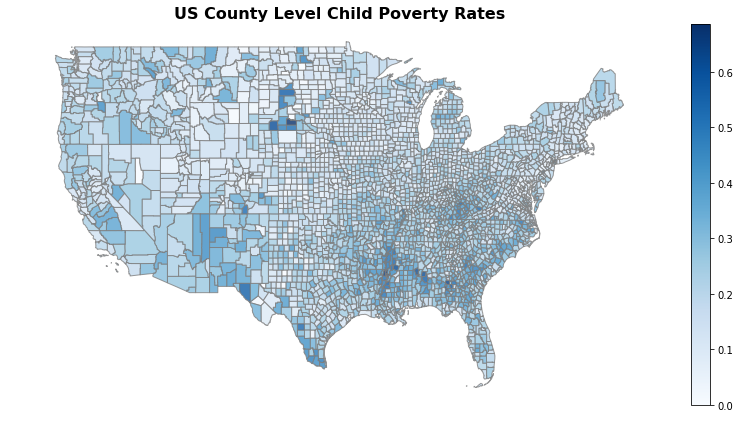

In [128]:
fig, ax = plt.subplots(figsize = (14,7))

us_map.plot(ax = ax, edgecolor='tab:grey',
             column='Child Poverty Rate in 2016', 
             cmap='Blues', 
             alpha = 0.8,
             legend = True)
ax.set_axis_off()

ax.set_title("US County Level Child Poverty Rates",loc='center', fontsize=16, fontweight = "bold")

plt.show()

**Summary**: It is manifest to see from the map that the distribution of child poverty within the United States is very uneven. High child poverty rates are concentrates in the south and north-west regions.

## Part 2: Investigating Two Contributing Factors of Child Poverty
---
In this part, two factors will be investigated with respect to child poverty. The first factor is race. I will compare child poverty rates bwtween four racial categories (White, Black, Asian, and Hispanic or Latino)

Below, I grab data for the four racial categories and do some calculations to get average child poverty rates and average young child poverty rate for each category.

WHITE ALONE

In [129]:
code = ("NAME", "B17020H_011E", # Above Poverty Level, White:Under 5 years
        "B17020H_012E",         # Above Poverty Level:5
        "B17020H_013E",         # Above Poverty Level:6-11
        "B17020H_014E",         # Above Poverty Level:12-17
        "B17020H_003E",         # Below Poverty Level, White:Under 5 years
        "B17020H_004E",         # Below Poverty Level:5
        "B17020H_005E",         # Below Poverty Level:6-11
        "B17020H_006E",         # Below Poverty Level:12-17                        
       )                       
                     

white = c.acs5.get(code, {'for': 'county:*' }, year=2016)

white = pd.DataFrame(white)

white=white.rename(columns=
                   {"B17020H_011E":"Above Poverty Level, White:Under 5 years",
                    "B17020H_012E":"Above Poverty Level:5",
                    "B17020H_013E":"Above Poverty Level:6-11",
                    "B17020H_014E":"Above Poverty Level:12-17",
                    "B17020H_003E":"Below Poverty Level, White:Under 5 years",
                    "B17020H_004E":"Below Poverty Level:5",
                    "B17020H_005E":"Below Poverty Level:6-11",
                    "B17020H_006E":"Below Poverty Level:12-17",
                    })

# Calculating total children (White) below poverty line 
white["Total Children in Poverty"]=white["Below Poverty Level, White:Under 5 years"]+white["Below Poverty Level:5"]
white["Total Children in Poverty"]=white["Total Children in Poverty"]+white["Below Poverty Level:6-11"]
white["Total Children in Poverty"]=white["Total Children in Poverty"]+white["Below Poverty Level:12-17"]

# Calculating total children (White) above poverty line
white["Total Children not in Poverty"]=white["Above Poverty Level, White:Under 5 years"]+white["Above Poverty Level:5"]
white["Total Children not in Poverty"]=white["Total Children not in Poverty"]+white["Above Poverty Level:6-11"]
white["Total Children not in Poverty"]=white["Total Children not in Poverty"]+white["Above Poverty Level:12-17"]

# Calculating total population of children (White)
white["Total White Children Population"]=white["Total Children in Poverty"]+white["Total Children not in Poverty"]

# Calculating poverty rate within race group (White)
white["Child Poverty Rate(White)"] = white["Total Children in Poverty"]/white["Total White Children Population"]

# Calculating total young children(<= 5 years) (White)
white["Total Young Children"] = (white["Below Poverty Level, White:Under 5 years"]+white["Below Poverty Level:5"]
                                +white["Above Poverty Level, White:Under 5 years"]+white["Above Poverty Level:5"])

# Calculating young children poverty rate
white["Young Children Poverty Rate"]=((white["Below Poverty Level, White:Under 5 years"]+
                                       white["Below Poverty Level:5"])/white["Total Young Children"])

In [130]:
white.set_index("state", inplace = True)

white.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

white.head()

,"Below Poverty Level, White:Under 5 years",Below Poverty Level:5,Below Poverty Level:6-11,Below Poverty Level:12-17,"Above Poverty Level, White:Under 5 years",Above Poverty Level:5,Above Poverty Level:6-11,Above Poverty Level:12-17,NAME,county,Total Children in Poverty,Total Children not in Poverty,Total White Children Population,Child Poverty Rate(White),Total Young Children,Young Children Poverty Rate
state,,,,,,,,,,,,,,,,
01,421.0,450.0,548.0,1930.0,2421.0,3117.0,2897.0,21145.0,"Autauga County, Alabama",001,3349.0,29580.0,32929.0,0.101704,6409.0,0.135903
01,1846.0,1769.0,1454.0,9047.0,8427.0,9579.0,10497.0,74699.0,"Baldwin County, Alabama",003,14116.0,103202.0,117318.0,0.120323,21621.0,0.167199
01,147.0,37.0,19.0,590.0,483.0,600.0,631.0,4813.0,"Barbour County, Alabama",005,793.0,6527.0,7320.0,0.108333,1267.0,0.145225
01,251.0,231.0,249.0,1238.0,879.0,943.0,1057.0,7620.0,"Bibb County, Alabama",007,1969.0,10499.0,12468.0,0.157924,2304.0,0.209201
01,758.0,862.0,637.0,3706.0,2341.0,2985.0,3197.0,22903.0,"Blount County, Alabama",009,5963.0,31426.0,37389.0,0.159485,6946.0,0.233228


In [131]:
# Calculating average child poverty rate and young child poverty rate
avg_w = (white["Total Children in Poverty"].sum())/(white["Total White Children Population"].sum())
avg_w_y = ((white["Below Poverty Level, White:Under 5 years"].sum()+white["Below Poverty Level:5"].sum())
           /(white["Total Young Children"].sum()))

In [132]:
print(avg_w,avg_w_y)

0.11627482811014105 0.1353435610358777


BLACK OR AFRICAN AMERICAN

In [133]:
code = ("NAME",
        "B17020B_011E", # Above Poverty Level, Black:Under 5 years
        "B17020B_012E", # Above Poverty Level:5
        "B17020B_013E", # Above Poverty Level:6-11
        "B17020B_014E", # Above Poverty Level:12-17
        "B17020B_003E", # Below Poverty Level, Black:Under 5 years
        "B17020B_004E", # Below Poverty Level:5
        "B17020B_005E", # Below Poverty Level:6-11
        "B17020B_006E", # Below Poverty Level:12-17
        
       )

black = c.acs5.get(code, {'for': 'county:*' }, year=2016)

black = pd.DataFrame(black)

black=black.rename(columns=
                   {"B17020B_011E":"Above Poverty Level, Black:Under 5 years",
                    "B17020B_012E":"Above Poverty Level:5",
                    "B17020B_013E":"Above Poverty Level:6-11",
                    "B17020B_014E":"Above Poverty Level:12-17",
                    "B17020B_003E":"Below Poverty Level, Black:Under 5 years",
                    "B17020B_004E":"Below Poverty Level:5",
                    "B17020B_005E":"Below Poverty Level:6-11",
                    "B17020B_006E":"Below Poverty Level:12-17"    
                    })

# Calculating total children (Black) below poverty line 
black["Total Children in Poverty"]=black["Below Poverty Level, Black:Under 5 years"]+black["Below Poverty Level:5"]
black["Total Children in Poverty"]=black["Total Children in Poverty"]+black["Below Poverty Level:6-11"]
black["Total Children in Poverty"]=black["Total Children in Poverty"]+black["Below Poverty Level:12-17"]

# Calculating total children (Black) above poverty line
black["Total Children not in Poverty"]=black["Above Poverty Level, Black:Under 5 years"]+black["Above Poverty Level:5"]
black["Total Children not in Poverty"]=black["Total Children not in Poverty"]+black["Above Poverty Level:6-11"]
black["Total Children not in Poverty"]=black["Total Children not in Poverty"]+black["Above Poverty Level:12-17"]

# Calculating total population of children (Black)
black["Total Black Children population"]=black["Total Children in Poverty"]+black["Total Children not in Poverty"]

# Calculating poverty rate within race group (Black)
black["Child Poverty Rate(Black)"] = black["Total Children in Poverty"]/black["Total Black Children population"]

# Calculating total young children(<= 5 years) (Black)
black["Total Young Children"] = (black["Below Poverty Level, Black:Under 5 years"]+black["Below Poverty Level:5"]
                                +black["Above Poverty Level, Black:Under 5 years"]+black["Above Poverty Level:5"])

# Calculating young children poverty rate
black["Young Children Poverty Rate"]=((black["Below Poverty Level, Black:Under 5 years"]+
                                       black["Below Poverty Level:5"])/black["Total Young Children"])

In [134]:
black.set_index("state", inplace = True)

black.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

black.head()

,"Below Poverty Level, Black:Under 5 years",Below Poverty Level:5,Below Poverty Level:6-11,Below Poverty Level:12-17,"Above Poverty Level, Black:Under 5 years",Above Poverty Level:5,Above Poverty Level:6-11,Above Poverty Level:12-17,NAME,county,Total Children in Poverty,Total Children not in Poverty,Total Black Children population,Child Poverty Rate(Black),Total Young Children,Young Children Poverty Rate
state,,,,,,,,,,,,,,,,
01,143.0,314.0,290.0,1460.0,612.0,596.0,706.0,4343.0,"Autauga County, Alabama",001,2207.0,6257.0,8464.0,0.260751,1665.0,0.274474
01,918.0,652.0,459.0,2779.0,523.0,1040.0,1317.0,7392.0,"Baldwin County, Alabama",003,4808.0,10272.0,15080.0,0.318833,3133.0,0.501117
01,874.0,547.0,631.0,1928.0,170.0,421.0,467.0,4075.0,"Barbour County, Alabama",005,3980.0,5133.0,9113.0,0.436739,2012.0,0.706262
01,179.0,67.0,181.0,364.0,22.0,230.0,212.0,1725.0,"Bibb County, Alabama",007,791.0,2189.0,2980.0,0.265436,498.0,0.493976
01,18.0,14.0,1.0,35.0,59.0,88.0,39.0,381.0,"Blount County, Alabama",009,68.0,567.0,635.0,0.107087,179.0,0.178771


In [135]:
# Calculating average child poverty rate and young child poverty rate
avg_b = (black["Total Children in Poverty"].sum())/(black["Total Black Children population"].sum())
avg_b_y = ((black["Below Poverty Level, Black:Under 5 years"].sum()+black["Below Poverty Level:5"].sum())
           /(black["Total Young Children"].sum()))

In [136]:
print(avg_b,avg_b_y)

0.27650687690756165 0.3990017145176958


ASIAN ALONE

In [137]:
code = ("NAME",
        "B17020D_011E", # Above Poverty Level, Asian:Under 5 years
        "B17020D_012E", # Above Poverty Level:5
        "B17020D_013E", # Above Poverty Level:6-11
        "B17020D_014E", # Above Poverty Level:12-17
        "B17020D_003E", # Below Poverty Level, Asian:Under 5 years
        "B17020D_004E", # Below Poverty Level:5
        "B17020D_005E", # Below Poverty Level:6-11
        "B17020D_006E", # Below Poverty Level:12-17
        
       )

a = c.acs5.get(code, {'for': 'county:*' }, year=2016)

a = pd.DataFrame(a)

a = a.rename(columns = 
               {"B17020D_011E":"Above Poverty Level, Asian:Under 5 years",
                "B17020D_012E":"Above Poverty Level:5",
                "B17020D_013E":"Above Poverty Level:6-11",
                "B17020D_014E":"Above Poverty Level:12-17",
                "B17020D_003E":"Below Poverty Level, Asian:Under 5 years",
                "B17020D_004E":"Below Poverty Level:5",
                "B17020D_005E":"Below Poverty Level:6-11",
                "B17020D_006E":"Below Poverty Level:12-17",
                })

# Calculating total children (Asian) below poverty line 
a["Total Children in Poverty"]=a["Below Poverty Level, Asian:Under 5 years"]+a["Below Poverty Level:5"]
a["Total Children in Poverty"]=a["Total Children in Poverty"]+a["Below Poverty Level:6-11"]
a["Total Children in Poverty"]=a["Total Children in Poverty"]+a["Below Poverty Level:12-17"]

# Calculating total children (Asian) above poverty line
a["Total Children not in Poverty"]=a["Above Poverty Level, Asian:Under 5 years"]+a["Above Poverty Level:5"]
a["Total Children not in Poverty"]=a["Total Children not in Poverty"]+a["Above Poverty Level:6-11"]
a["Total Children not in Poverty"]=a["Total Children not in Poverty"]+a["Above Poverty Level:12-17"]

# Calculating total population of children (Asian)
a["Total Asian Chidren Population"]=a["Total Children in Poverty"]+a["Total Children not in Poverty"]

# Calculating poverty rate within race group (Asian)
a["Child Poverty Rate(Asian)"] = a["Total Children in Poverty"]/a["Total Asian Chidren Population"]

# Calculating total young children(<= 5 years) (Asian)
a["Total Young Children"] = (a["Below Poverty Level, Asian:Under 5 years"]+a["Below Poverty Level:5"]
                            +a["Above Poverty Level, Asian:Under 5 years"]+a["Above Poverty Level:5"])

# Calculating young children poverty rate (Asian)
a["Young Children Poverty Rate"] =((a["Below Poverty Level, Asian:Under 5 years"]+
                                   a["Below Poverty Level:5"])/a["Total Young Children"])


In [138]:
a.set_index("state", inplace = True)

a.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

a.head()

,"Below Poverty Level, Asian:Under 5 years",Below Poverty Level:5,Below Poverty Level:6-11,Below Poverty Level:12-17,"Above Poverty Level, Asian:Under 5 years",Above Poverty Level:5,Above Poverty Level:6-11,Above Poverty Level:12-17,NAME,county,Total Children in Poverty,Total Children not in Poverty,Total Asian Chidren Population,Child Poverty Rate(Asian),Total Young Children,Young Children Poverty Rate
state,,,,,,,,,,,,,,,,
01,0.0,0.0,0.0,61.0,36.0,36.0,26.0,216.0,"Autauga County, Alabama",001,61.0,314.0,375.0,0.162667,72.0,0.0
01,0.0,0.0,105.0,514.0,56.0,104.0,35.0,300.0,"Baldwin County, Alabama",003,619.0,495.0,1114.0,0.555655,160.0,0.0
01,0.0,0.0,0.0,0.0,29.0,0.0,42.0,47.0,"Barbour County, Alabama",005,0.0,118.0,118.0,0.000000,29.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,"Bibb County, Alabama",007,0.0,14.0,14.0,0.000000,0.0,NaN
01,0.0,0.0,0.0,8.0,0.0,11.0,0.0,29.0,"Blount County, Alabama",009,8.0,40.0,48.0,0.166667,11.0,0.0


In [139]:
# Calculating average child poverty rate and young child poverty rate
avg_a = (a["Total Children in Poverty"].sum())/(a["Total Asian Chidren Population"].sum())
avg_a_y = ((a["Below Poverty Level, Asian:Under 5 years"].sum() + a["Below Poverty Level:5"].sum())
           /(a["Total Young Children"].sum()))

In [140]:
print(avg_a,avg_a_y)

0.12516606630684213 0.12064035970867873


HISPANIC OR LATINO

In [141]:
code = ("NAME",
        "B17020I_011E", # Above Poverty Level, Hispanic or Latino:Under 5 years
        "B17020I_012E", # Above Poverty Level:5
        "B17020I_013E", # Above Poverty Level:6-11
        "B17020I_014E", # Above Poverty Level:12-17
        "B17020I_003E", # Below Poverty Level, Hispanic or Latino:Under 5 years
        "B17020I_004E", # Below Poverty Level:5
        "B17020I_005E", # Below Poverty Level:6-11
        "B17020I_006E", # Below Poverty Level:12-17
        
       )

hl = c.acs5.get(code, {'for': 'county:*' }, year=2016)

hl = pd.DataFrame(hl)

hl = hl.rename(columns = 
               {"B17020I_011E":"Above Poverty Level, His./Latino:Under 5 years",
                "B17020I_012E":"Above Poverty Level:5",
                "B17020I_013E":"Above Poverty Level:6-11",
                "B17020I_014E":"Above Poverty Level:12-17",
                "B17020I_003E":"Below Poverty Level, His./Latino:Under 5 years",
                "B17020I_004E":"Below Poverty Level:5",
                "B17020I_005E":"Below Poverty Level:6-11",
                "B17020I_006E":"Below Poverty Level:12-17",
                })

# Calculating total children (Hispanic or Latino) below poverty line 
hl["Total Children in Poverty"]=hl["Below Poverty Level, His./Latino:Under 5 years"]+hl["Below Poverty Level:5"]
hl["Total Children in Poverty"]=hl["Total Children in Poverty"]+hl["Below Poverty Level:6-11"]
hl["Total Children in Poverty"]=hl["Total Children in Poverty"]+hl["Below Poverty Level:12-17"]

# Calculating total children (Hispanic or Latino) above poverty line
hl["Total Children not in Poverty"]=hl["Above Poverty Level, His./Latino:Under 5 years"]+hl["Above Poverty Level:5"]
hl["Total Children not in Poverty"]=hl["Total Children not in Poverty"]+hl["Above Poverty Level:6-11"]
hl["Total Children not in Poverty"]=hl["Total Children not in Poverty"]+hl["Above Poverty Level:12-17"]

# Calculating total population of children (Hispanic or Latino)
hl["Total His./Latino Chidren Population"]=hl["Total Children in Poverty"]+hl["Total Children not in Poverty"]

# Calculating poverty rate within race group (Hispanic or Latino)
hl["Child Poverty Rate(Hispanic/Latino)"]=hl["Total Children in Poverty"]/hl["Total His./Latino Chidren Population"]

# Calculating total young children(< 5 years) (Hispanic or Latino)
hl["Total Young Children"] = (hl["Below Poverty Level, His./Latino:Under 5 years"]+hl["Below Poverty Level:5"]
                             +hl["Above Poverty Level, His./Latino:Under 5 years"]+hl["Above Poverty Level:5"])


# Calculating young children poverty rate (Hispanic or Latino)
hl["Young Children Poverty Rate"] = ((hl["Below Poverty Level, His./Latino:Under 5 years"]+hl["Below Poverty Level:5"])
                                     /hl["Total Young Children"])

In [142]:
hl.set_index("state", inplace = True)

hl.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

hl.head()

,"Below Poverty Level, His./Latino:Under 5 years",Below Poverty Level:5,Below Poverty Level:6-11,Below Poverty Level:12-17,"Above Poverty Level, His./Latino:Under 5 years",Above Poverty Level:5,Above Poverty Level:6-11,Above Poverty Level:12-17,NAME,county,Total Children in Poverty,Total Children not in Poverty,Total His./Latino Chidren Population,Child Poverty Rate(Hispanic/Latino),Total Young Children,Young Children Poverty Rate
state,,,,,,,,,,,,,,,,
01,22.0,42.0,21.0,76.0,73.0,125.0,226.0,742.0,"Autauga County, Alabama",001,161.0,1166.0,1327.0,0.121326,262.0,0.244275
01,186.0,93.0,50.0,585.0,1107.0,1051.0,710.0,4259.0,"Baldwin County, Alabama",003,914.0,7127.0,8041.0,0.113667,2437.0,0.114485
01,94.0,137.0,60.0,193.0,78.0,48.0,32.0,422.0,"Barbour County, Alabama",005,484.0,580.0,1064.0,0.454887,357.0,0.647059
01,62.0,10.0,6.0,29.0,19.0,18.0,9.0,240.0,"Bibb County, Alabama",007,107.0,286.0,393.0,0.272265,109.0,0.660550
01,390.0,526.0,233.0,797.0,228.0,272.0,363.0,1908.0,"Blount County, Alabama",009,1946.0,2771.0,4717.0,0.412550,1416.0,0.646893


In [143]:
# Calculating average child poverty rate and young child poverty rate
avg_h = (hl["Total Children in Poverty"].sum())/(hl["Total His./Latino Chidren Population"].sum())
avg_h_y = ((hl["Below Poverty Level, His./Latino:Under 5 years"].sum()+hl["Below Poverty Level:5"].sum())
           /(hl["Total Young Children"].sum()))

In [144]:
print(avg_h,avg_h_y)

0.23965673447525995 0.3279881793492399


Then I create a new DataFrame summarizing the average child poverty rates and young child poverty rates for different races and plot a bar chart to visually show the results.

In [145]:
d = {"Race":["White","Black","Asian","Hispanic/Latino"],
     "Under 18 years old":[avg_w,avg_b,avg_a,avg_h],
     "Under 6 years old":[avg_w_y,avg_b_y,avg_a_y,avg_h_y]}

avg_pov_rate = pd.DataFrame(data = d)

avg_pov_rate.set_index("Race",inplace = True)                

In [146]:
avg_pov_rate

,Under 18 years old,Under 6 years old
Race,,
White,0.116275,0.135344
Black,0.276507,0.399002
Asian,0.125166,0.120640
Hispanic/Latino,0.239657,0.327988


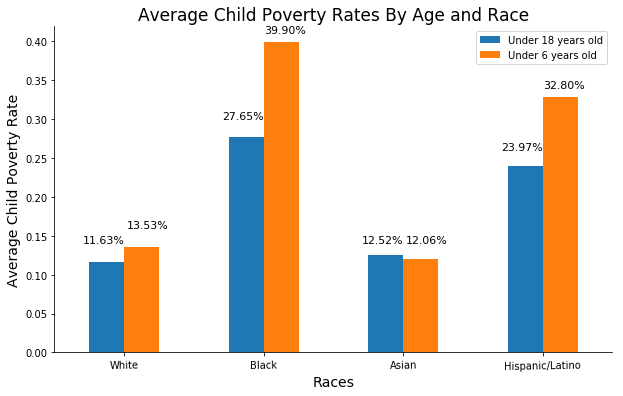

In [147]:
fig, ax = plt.subplots(figsize = (10,6))

avg_pov_rate.plot(ax=ax,kind = "bar", rot=1)

ax.set_title("Average Child Poverty Rates By Age and Race", fontsize = 17)

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

ax.set_xlabel("Races", fontsize = 14)
ax.set_ylabel("Average Child Poverty Rate",fontsize = 14)

ax.text(-0.3,0.14, '%.2f%%' % (avg_w * 100),fontsize = 11)
ax.text(0.02,0.16, '%.2f%%' % (avg_w_y * 100),fontsize = 11)
ax.text(0.7,0.30, '%.2f%%' % (avg_b * 100),fontsize = 11)
ax.text(1,0.41, '%.2f%%' % (avg_b_y * 100),fontsize = 11)
ax.text(1.7,0.14, '%.2f%%' % (avg_a * 100),fontsize = 11)
ax.text(2.02,0.14, '%.2f%%' % (avg_a_y * 100),fontsize = 11)
ax.text(2.7,0.26, '%.2f%%' % (avg_h * 100),fontsize = 11)
ax.text(3,0.34, '%.2f%%' % (avg_h_y * 100),fontsize = 11)

plt.show()

**Summary**: From this graph, we can tell that the child poverty rates across different races differ greatly. White and Asian have about the same level of child poverty rates and young child poverty rates. Average child poverty rates of Black and Hispanic/Latino are more than twice of the rate for White children, and young children poverty is even more severe for Black and Hispanic/Latino.

Next, I will examine how different **family types** contribute to children poverty.

In [148]:
# all races
code = ("NAME",
        "B17010_004E",#below poverty line:Number of Married-Couple Families with children under18
        "B17010_011E",#below poverty line:Male householder with children under 18
        "B17010_017E",#below poverty line:Female householder with children under 18
        "B17010_024E",#above poverty line:Number of Married-Couple Families with children under18
        "B17010_031E",#above poverty line:Male householder with children under 18
        "B17010_037E" #above poverty line:Female householder with children under 18
       )

f = c.acs5.get(code, {'for': 'county:*' }, year=2016)
f = pd.DataFrame(f)

f = f.rename(columns = 
   {"B17010_004E":"Below Poverty Line:Married-Couple families with children under 18",
    "B17010_011E":"Below Poverty Line:Male householder with children under 18",
    "B17010_017E":"Below Poverty Line:Female householder with children under 18",
    "B17010_024E":"Above Poverty Line: Number of Married-Couple Families with children under 18",
    "B17010_031E":"Above Poverty Line: Male householder with children under 18",
    "B17010_037E":"Above Poverty Line: Female householder with children under 18"
    })

bp_1 = "Below Poverty Line:Married-Couple families with children under 18"
ap_1 = "Above Poverty Line: Number of Married-Couple Families with children under 18"

f["Total Married Families with Children"] = f[bp_1] + f[ap_1]

bp_2 = "Below Poverty Line:Male householder with children under 18"
ap_2 = "Above Poverty Line: Male householder with children under 18"

f["Total families with children with male householder only"] = f[bp_2] + f[ap_2]

bp_3 = "Below Poverty Line:Female householder with children under 18"
ap_3 = "Above Poverty Line: Female householder with children under 18"

f["total families with children with female householder only"] = f[bp_3]+ f[ap_3]

f["Married-Couple %"] = f[bp_1]/f["Total Married Families with Children"]
f["Male Householder %"] = f[bp_2]/f["Total families with children with male householder only"]
f["Female Householder %"] = f[bp_3]/f["total families with children with female householder only"]


In [149]:
f.set_index("state", inplace = True)

f.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

In [150]:
f_1 = f[bp_1].sum()/f["Total Married Families with Children"].sum()
f_2 = f[bp_2].sum()/f["Total families with children with male householder only"].sum()
f_3 = f[bp_3].sum()/f["total families with children with female householder only"].sum()

In [151]:
f_1,f_2,f_3

(0.07951464500854909, 0.21625096450371667, 0.3980768737337583)

In [152]:
# white
code = ("NAME",
        "B17010H_004E",#below poverty line:Number of Married-Couple Families with children under18
        "B17010H_011E",#below poverty line:Male householder with children under 18
        "B17010H_017E",#below poverty line:Female householder with children under 18
        "B17010H_024E",#above poverty line:Number of Married-Couple Families with children under18
        "B17010H_031E",#above poverty line:Male householder with children under 18
        "B17010H_037E" #above poverty line:Female householder with children under 18
       )

f_w = c.acs5.get(code, {'for': 'county:*' }, year=2016)
f_w = pd.DataFrame(f_w)

f_w = f_w.rename(columns =
    {"B17010H_004E":"Below Poverty Line:Married-Couple families with children under 18",
    "B17010H_011E":"Below Poverty Line:Male householder with children under 18",
    "B17010H_017E":"Below Poverty Line:Female householder with children under 18",
    "B17010H_024E":"Above Poverty Line: Number of Married-Couple Families with children under 18",
    "B17010H_031E":"Above Poverty Line: Male householder with children under 18",
    "B17010H_037E":"Above Poverty Line: Female householder with children under 18"
    })

f_w["Total Married Families with Children"] = f_w[bp_1] + f_w[ap_1]

f_w["Total families with children with male householder only"] = f_w[bp_2] + f_w[ap_2]

f_w["total families with children with female householder only"] = f_w[bp_3]+ f_w[ap_3]


In [153]:
f_w.set_index("state", inplace = True)

f_w.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

In [154]:
f_w_1 = f_w[bp_1].sum()/f_w["Total Married Families with Children"].sum()
f_w_2 = f_w[bp_2].sum()/f_w["Total families with children with male householder only"].sum()
f_w_3 = f_w[bp_3].sum()/f_w["total families with children with female householder only"].sum()

In [155]:
# Black
code = ("NAME",
        "B17010B_004E",#below poverty line:Number of Married-Couple Families with children under18
        "B17010B_011E",#below poverty line:Male householder with children under 18
        "B17010B_017E",#below poverty line:Female householder with children under 18
        "B17010B_024E",#above poverty line:Number of Married-Couple Families with children under18
        "B17010B_031E",#above poverty line:Male householder with children under 18
        "B17010B_037E" #above poverty line:Female householder with children under 18
       )

f_b = c.acs5.get(code, {'for': 'county:*' }, year=2016)
f_b = pd.DataFrame(f_b)

f_b =f_b.rename(columns=
    {"B17010B_004E":"Below Poverty Line:Married-Couple families with children under 18",
    "B17010B_011E":"Below Poverty Line:Male householder with children under 18",
    "B17010B_017E":"Below Poverty Line:Female householder with children under 18",
    "B17010B_024E":"Above Poverty Line: Number of Married-Couple Families with children under 18",
    "B17010B_031E":"Above Poverty Line: Male householder with children under 18",
    "B17010B_037E":"Above Poverty Line: Female householder with children under 18"
    })

f_b["Total Married Families with Children"] = f_b[bp_1] + f_b[ap_1]

f_b["Total families with children with male householder only"] = f_b[bp_2] + f_b[ap_2]

f_b["total families with children with female householder only"] = f_b[bp_3]+ f_b[ap_3]

In [156]:
f_b.set_index("state", inplace = True)

f_b.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

In [157]:
f_b_1 = f_b[bp_1].sum()/f_b["Total Married Families with Children"].sum()
f_b_2 = f_b[bp_2].sum()/f_b["Total families with children with male householder only"].sum()
f_b_3 = f_b[bp_3].sum()/f_b["total families with children with female householder only"].sum()

In [158]:
# Asian
code = ("NAME",
        "B17010D_004E",#below poverty line:Number of Married-Couple Families with children under18
        "B17010D_011E",#below poverty line:Male householder with children under 18
        "B17010D_017E",#below poverty line:Female householder with children under 18
        "B17010D_024E",#above poverty line:Number of Married-Couple Families with children under18
        "B17010D_031E",#above poverty line:Male householder with children under 18
        "B17010D_037E" #above poverty line:Female householder with children under 18
       )

f_a = c.acs5.get(code, {'for': 'county:*' }, year=2016)
f_a = pd.DataFrame(f_a)

f_a = f_a.rename(columns = 
    {"B17010D_004E":"Below Poverty Line:Married-Couple families with children under 18",
    "B17010D_011E":"Below Poverty Line:Male householder with children under 18",
    "B17010D_017E":"Below Poverty Line:Female householder with children under 18",
    "B17010D_024E":"Above Poverty Line: Number of Married-Couple Families with children under 18",
    "B17010D_031E":"Above Poverty Line: Male householder with children under 18",
    "B17010D_037E":"Above Poverty Line: Female householder with children under 18"
    })

bp_1 = "Below Poverty Line:Married-Couple families with children under 18"
ap_1 = "Above Poverty Line: Number of Married-Couple Families with children under 18"

f_a["Total Married Families with Children"] = f_a[bp_1] + f_a[ap_1]

bp_2 = "Below Poverty Line:Male householder with children under 18"
ap_2 = "Above Poverty Line: Male householder with children under 18"

f_a["Total families with children with male householder only"] = f_a[bp_2] + f_a[ap_2]

bp_3 = "Below Poverty Line:Female householder with children under 18"
ap_3 = "Above Poverty Line: Female householder with children under 18"

f_a["total families with children with female householder only"] = f_a[bp_3]+ f_a[ap_3]

In [159]:
f_a.set_index("state", inplace = True)

f_a.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

In [160]:
f_a_1 = f_a[bp_1].sum()/f_a["Total Married Families with Children"].sum()
f_a_2 = f_a[bp_2].sum()/f_a["Total families with children with male householder only"].sum()
f_a_3 = f_a[bp_3].sum()/f_a["total families with children with female householder only"].sum()

In [161]:
# Hispanic or latino
code = ("NAME",
        "B17010I_004E",#below poverty line:Number of Married-Couple Families with children under18
        "B17010I_011E",#below poverty line:Male householder with children under 18
        "B17010I_017E",#below poverty line:Female householder with children under 18
        "B17010I_024E",#above poverty line:Number of Married-Couple Families with children under18
        "B17010I_031E",#above poverty line:Male householder with children under 18
        "B17010I_037E" #above poverty line:Female householder with children under 18
       )

f_h = c.acs5.get(code, {'for': 'county:*' }, year=2016)
f_h = pd.DataFrame(f_h)

f_h = f_h.rename(columns =
    {"B17010I_004E":"Below Poverty Line:Married-Couple families with children under 18",
    "B17010I_011E":"Below Poverty Line:Male householder with children under 18",
    "B17010I_017E":"Below Poverty Line:Female householder with children under 18",
    "B17010I_024E":"Above Poverty Line: Number of Married-Couple Families with children under 18",
    "B17010I_031E":"Above Poverty Line: Male householder with children under 18",
    "B17010I_037E":"Above Poverty Line: Female householder with children under 18"
    })

f_h["Total Married Families with Children"] = f_h[bp_1] +f_h[ap_1]

f_h["Total families with children with male householder only"] = f_h[bp_2] + f_h[ap_2]

f_h["total families with children with female householder only"] = f_h[bp_3]+ f_h[ap_3]

In [162]:
f_h.set_index("state", inplace = True)

f_h.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

In [163]:
f_h_1 = f_h[bp_1].sum()/f_h["Total Married Families with Children"].sum()
f_h_2 = f_h[bp_2].sum()/f_h["Total families with children with male householder only"].sum()
f_h_3 = f_h[bp_3].sum()/f_h["total families with children with female householder only"].sum()

Then I create a new DataFrame summarizing poverty rates of different family types and plot a bar chart to visually show the results.

In [164]:
d1 = {"Race":["All Races","White","Black","Asian","Hispanic/Latino"],
     "Married-Couple families with children Below Poverty Line":[f_1,f_w_1,f_b_1,f_a_1,f_h_1],
     "Families with Male householder only with children Below Poverty Line":[f_2,f_w_2,f_b_2,f_a_2,f_h_2],
     "Families with Female householder only with children Below Poverty Line":[f_3,f_w_3,f_b_3,f_a_3,f_h_3]
    }

family_type = pd.DataFrame(data = d1)


family_type.set_index("Race",inplace = True)                

family_type

,Families with Female householder only with children Below Poverty Line,Families with Male householder only with children Below Poverty Line,Married-Couple families with children Below Poverty Line
Race,,,
All Races,0.398077,0.216251,0.079515
White,0.329043,0.166389,0.049482
Black,0.450800,0.307280,0.103176
Asian,0.278583,0.177944,0.076373
Hispanic/Latino,0.474060,0.263436,0.173504


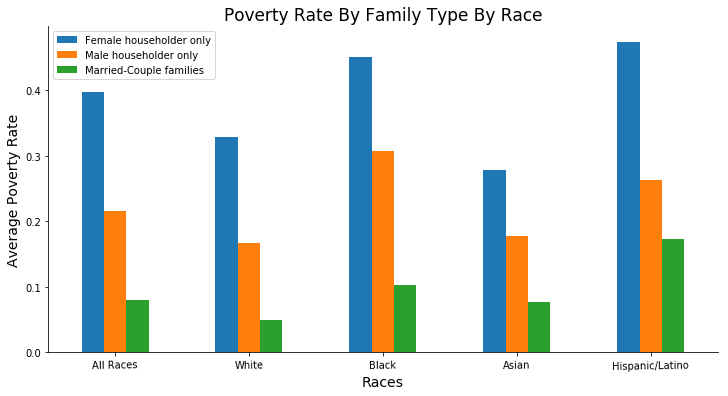

In [165]:
fig, ax = plt.subplots(figsize = (12,6))

family_type.plot(ax=ax,kind = "bar", rot=1)

ax.set_title("Poverty Rate By Family Type By Race", fontsize = 17)

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

ax.set_xlabel("Races", fontsize = 14)
ax.set_ylabel("Average Poverty Rate",fontsize = 14)

ax.legend(["Female householder only","Male householder only","Married-Couple families"])

plt.show()


**Summary**: We can see clearly from this graph that family type plays a role in child poverty, and the patterns persist across different races. Children from single-mother families are suffering highest poverty rates, and children from married-couple families have the lowest poverty rates. This shows that children from single-parent families are more likely to be in poverty than married-coupled families, and children with a single mother are more likely to be in poverty than children with a single father. 

## Part 3: Geographic Variations and Racial Distribution
---
As we can see from the map at the end of part one, child poverty has geographical variations. Regarding the above two contributing factors, I think family type is more like a micro factor that is not very related to geographics,however, racial concentration is one of the most important demographics for a region and varies across different regions. In this part, I will investigate the relationship between geographic variations of child poverty and racial distribution.

Below, I grab data and calculate non-white population for different counties. Then I plot a national map indicating the non-white concentration across different counties, with counties with high non-white concentration(>25%) outlined in red.

In [166]:
code = ("NAME",
        "B02001_001E",  # Total population
        "B02001_002E"   # Total white population
       )
        
pop = c.acs5.get(code, {'for': 'county:*' }, year=2016)
        
pop = pd.DataFrame(pop)

pop = pop.rename(columns = {"B02001_001E":"Total Population",
                            "B02001_002E":"Total White Population"})

# Calculating total non-white population
pop["Total Non-White Population"] = pop["Total Population"] - pop["Total White Population"]

# Caculating non-white concentration
pop["Non-White Concentration"] = pop["Total Non-White Population"]/ pop["Total Population"]

In [167]:
pop.set_index("state", inplace = True)

pop.drop(["02","15","72"],inplace = True) # dropping Alaska, Hawaii and Puerto Rico

pop.reset_index(inplace = True)

pop.rename(columns= {"state":"STATEFP","county":"COUNTYFP"}, inplace = True)

pop.head()

,STATEFP,Total Population,Total White Population,NAME,COUNTYFP,Total Non-White Population,Non-White Concentration
0,01,55049.0,42311.0,"Autauga County, Alabama",001,12738.0,0.231394
1,01,199510.0,172441.0,"Baldwin County, Alabama",003,27069.0,0.135677
2,01,26614.0,12430.0,"Barbour County, Alabama",005,14184.0,0.532953
3,01,22572.0,17370.0,"Bibb County, Alabama",007,5202.0,0.230463
4,01,57704.0,55073.0,"Blount County, Alabama",009,2631.0,0.045595


In [168]:
cwd = os.getcwd()

regions_shape = cwd + "/USCounty/cb_2016_us_county_5m.shx"

us_map_2 = gpd.read_file(regions_shape)

us_map_2.set_index("STATEFP", inplace = True)

us_map_2.drop(["02","03","15","43","14","79","78","72","69","60","66"], inplace = True)

us_map_2.reset_index(inplace=True)

us_map_2.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52365999999999 29.622432, -81.32..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.041952 37.024742, -102.04195 37..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.7243244282036 34.9952117286505, ..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.318212 38.600017, -90.301828 38...."


In [169]:
us_map_2  = us_map_2.merge(pop, on=["STATEFP","COUNTYFP"], how = "outer")

us_map_2.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,geometry,Total Population,Total White Population,NAME_y,Total Non-White Population,Non-White Concentration
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3...",203629.0,182395.0,"Mohave County, Arizona",21234.0,0.104278
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52365999999999 29.622432, -81.32...",102917.0,84152.0,"Flagler County, Florida",18765.0,0.182331
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.041952 37.024742, -102.04195 37...",3033.0,2598.0,"Morton County, Kansas",435.0,0.143422
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.7243244282036 34.9952117286505, ...",36196.0,17811.0,"Marshall County, Mississippi",18385.0,0.507929
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.318212 38.600017, -90.301828 38....",316030.0,144226.0,"St. Louis city, Missouri",171804.0,0.543632


In [170]:
l = []
for n in us_map_2["Non-White Concentration"]:
    if n > 0.25:
        l.append(n)
        

In [171]:
high_con = us_map_2.set_index("Non-White Concentration").loc[l]

high_con.reset_index(inplace = True)

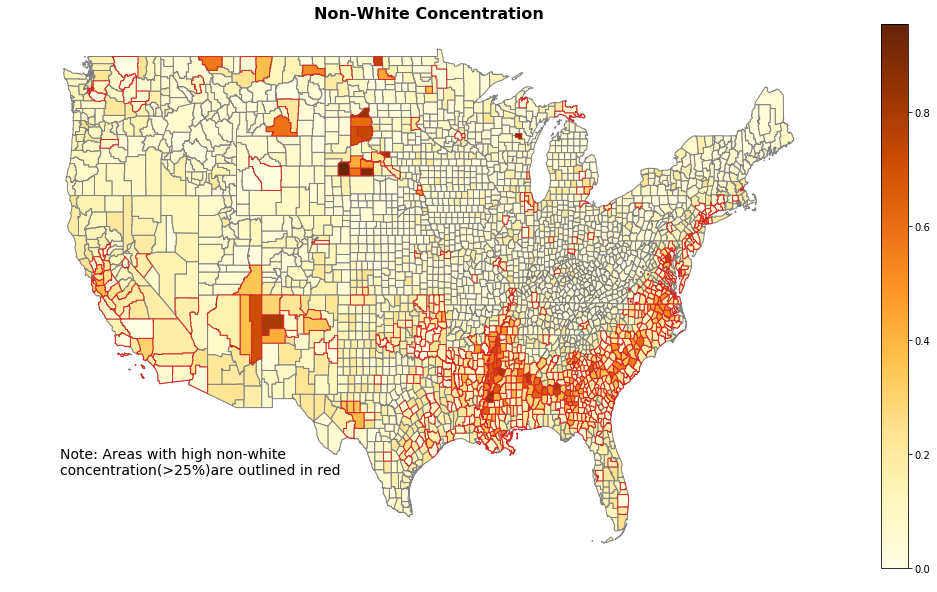

In [172]:
fig, ax = plt.subplots(figsize = (18,10))
us_map_2.plot(ax = ax, edgecolor='tab:grey',
             column='Non-White Concentration', 
             cmap='YlOrBr', 
             alpha = 1,
             legend = True)

high_con.plot(ax = ax, edgecolor='tab:red',
             column= "Non-White Concentration", 
             cmap='YlOrBr')

ax.set_axis_off()

ax.set_title("Non-White Concentration",loc='center', fontsize=16, fontweight = "bold")

ax.text(-125,28, "Note: Areas with high non-white\nconcentration(>25%)are outlined in red",fontsize = 14)


plt.show()

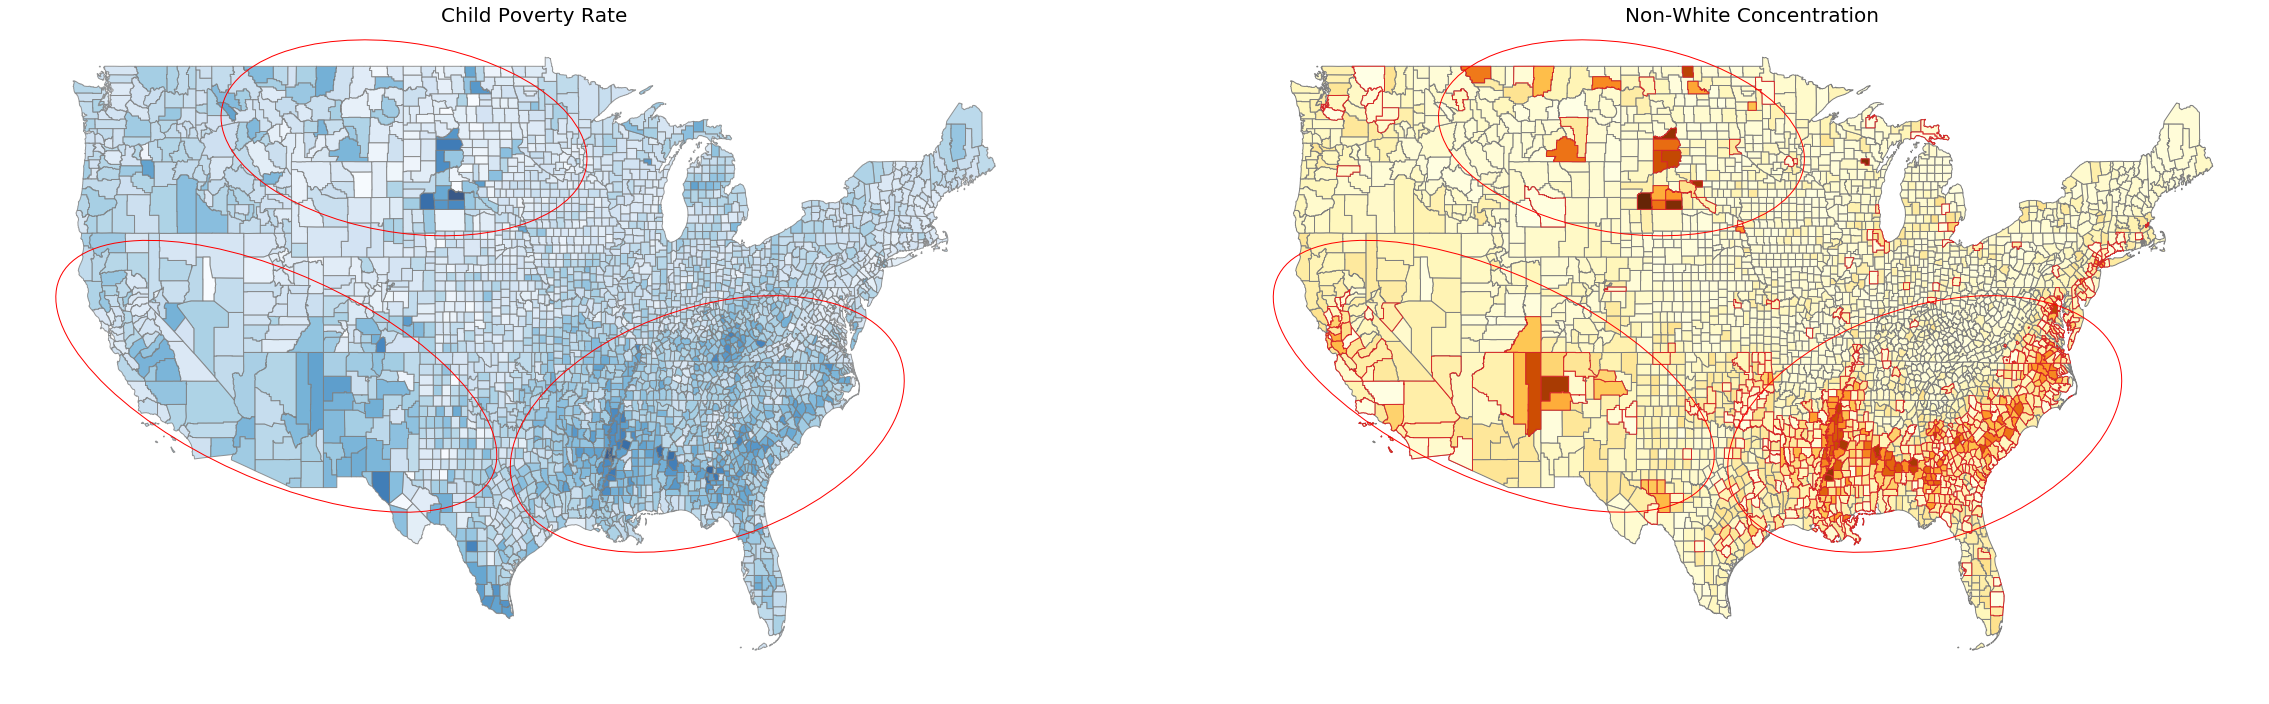

In [173]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (40,12)) 

us_map.plot(ax = ax[0], edgecolor='tab:grey',
             column='Child Poverty Rate in 2016', 
             cmap='Blues', 
             alpha = 0.8,
             )

us_map_2.plot(ax = ax[1], edgecolor='tab:grey',
             column='Non-White Concentration', 
             cmap='YlOrBr', 
             alpha = 1,
             )

high_con.plot(ax = ax[1], edgecolor='tab:red',
             column= "Non-White Concentration", 
             cmap='YlOrBr')

ax[0].set_axis_off()
ax[1].set_axis_off()

ax[0].set_title("Child Poverty Rate",fontsize=20)
ax[1].set_title("Non-White Concentration",fontsize=20)

circ_1 = Ellipse((-85,34),25,10,color = "r",fill = False,angle=10)
ax[0].add_patch(circ_1)

circ_2 = Ellipse((-85,34),25,10,color = "r",fill = False,angle=10)
ax[1].add_patch(circ_2)

circ_3 = Ellipse((-112,36),28.5,9,color = "r",fill = False,angle=-15)
ax[0].add_patch(circ_3)

circ_4 = Ellipse((-112,36),28.5,9,color = "r",fill = False,angle=-15)
ax[1].add_patch(circ_4)

circ_5 = Ellipse((-104,46),23,8,color = "r",fill = False,angle=-5)
ax[0].add_patch(circ_5)

circ_6 = Ellipse((-104,46),23,8,color = "r",fill = False,angle=-5)
ax[1].add_patch(circ_6)

plt.show()

**Summary**: Putting two maps together and comparing them, we can see very similar distribution patterns. Regions with the highest non-white concentration also have the highest child poverty rates (regions in red circles), suggesting that the geographical distibution of race and the geographical distribution of child poverty rates have high corralation. 

## Conclusion

Child poverty is a serious problem in the United States. One-fifth of all children in the United States are living in poverty, and younger children suffers more than older children. Race and family type play a role in child poverty. Black and Hipanic/Latino children are two to three times more likely to suffer from poverty than White and Asian children. Chidren from single-parent families are much more likely to suffer from poverty than children from married-couple families, and this trait persist across different races. Moreover, geographical distribution of child poverty is very uneven within the United States. This distribution pattern appears very similar with non-white concentration distribution, suggesting that the geographical distibution of race and the geographical distribution of child poverty rates have high corralation.